In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# importing dataset
dataset = pd.read_csv("/content/train.csv")

In [ ]:
dataset.head()

,Unnamed: 0,type,time,dayofweek,models,params,queuelen,trials,duration
0,1178,9.0,0.413889,3.0,21.0,535.0,0.0,40.0,0.0
1,877,9.0,0.643056,5.0,9.0,2682.0,0.0,40.0,0.0
2,4233,13.0,0.607639,4.0,32.0,3305.0,0.0,40.0,0.0
3,4134,8.0,0.643750,4.0,3.0,22023.0,0.0,40.0,0.0
4,3598,12.0,0.519444,3.0,8.0,3707.0,0.0,40.0,0.0


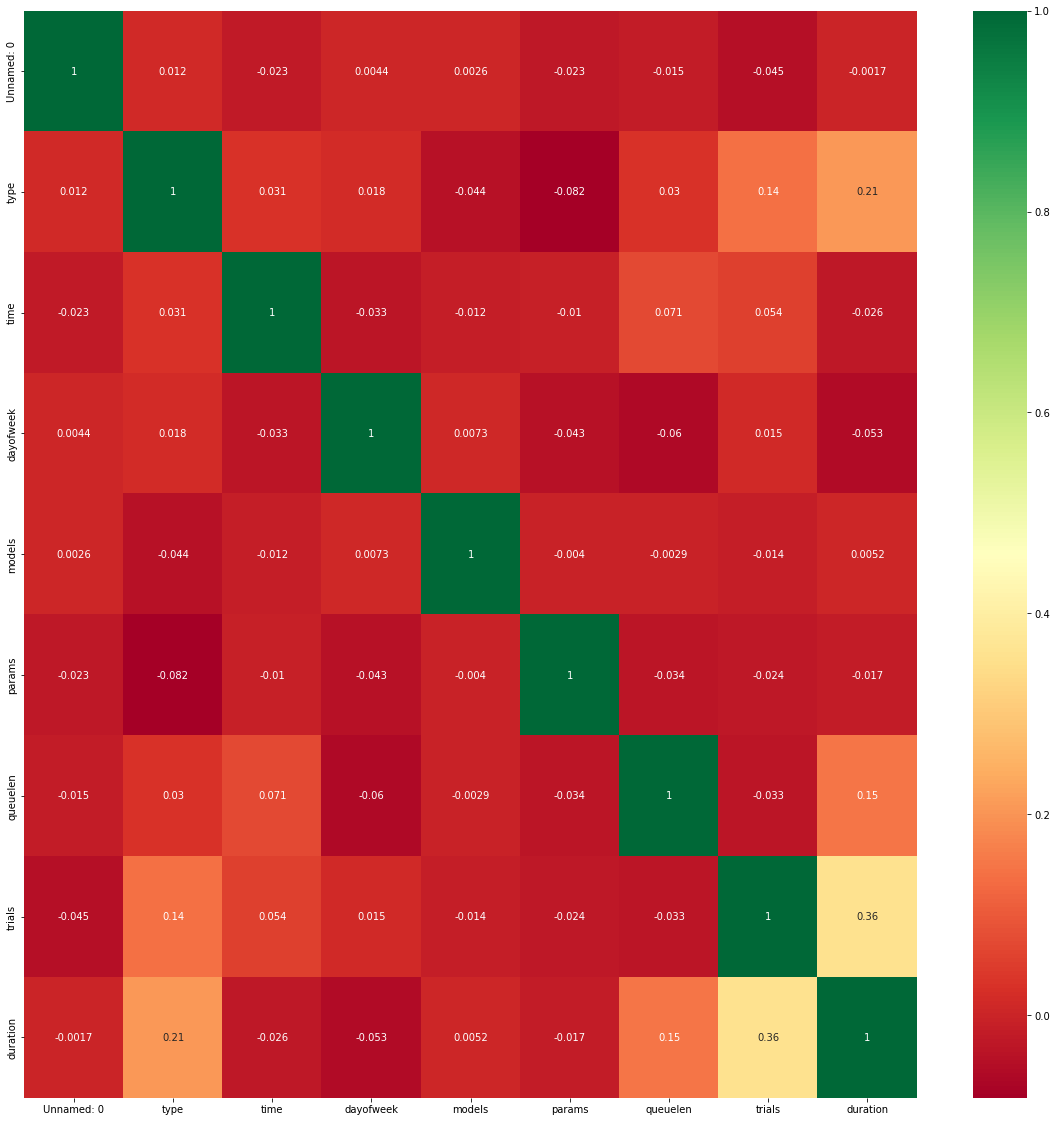

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'type', 'time', 'dayofweek', 'models', 'params',
       'queuelen', 'trials', 'duration'],
      dtype='object')

In [ ]:
# looking at the dataset we can drop the first column as it is not dependent on our model
dataset = dataset.drop("Unnamed: 0", axis=1)

In [ ]:
dataset.columns

Index(['type', 'time', 'dayofweek', 'models', 'params', 'queuelen', 'trials',
       'duration'],
      dtype='object')

In [ ]:
# importing the test dataset 
dataset_test = pd.read_csv("/content/test.csv")

In [ ]:
test_id = dataset_test["Unnamed: 0" ]

In [ ]:
dataset_test.drop(columns=["Unnamed: 0"], axis=1, inplace=True)


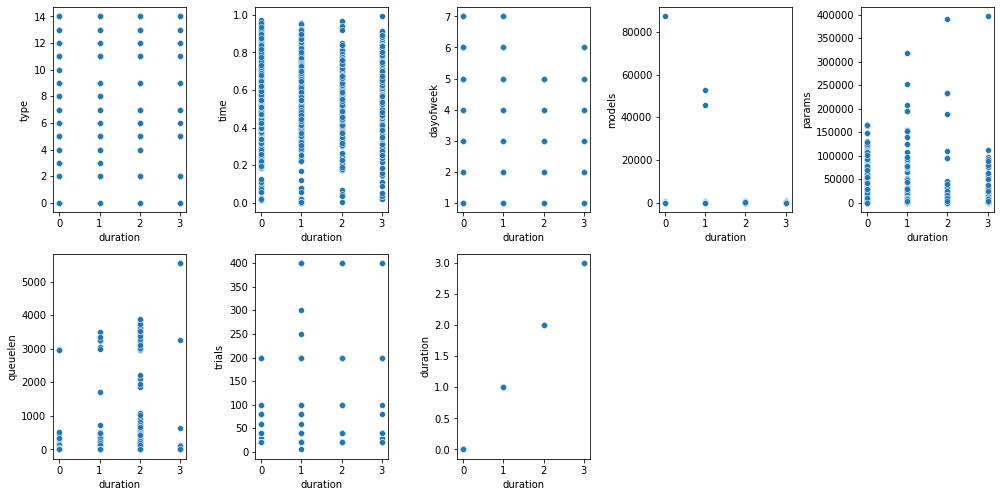

In [ ]:
# plotting the figure for checking the dependence of different features on duration
plt.figure(figsize = (14, 10))
plotnumber = 1

for column in dataset:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = dataset['duration'], y = dataset[column])

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# from the above plot I feel I should not drop any other feature

In [ ]:
dataset.describe()

,type,time,dayofweek,models,params,queuelen,trials,duration
count,3104.000000,3464.000000,3464.000000,3464.000000,3191.000000,3464.000000,3464.000000,3464.000000
mean,9.253222,0.571791,3.246536,82.018764,10834.270762,54.402425,58.599018,0.731236
std,3.642100,0.166895,1.571793,1901.719969,25712.079591,354.209141,68.524295,0.894489
min,0.000000,0.000694,1.000000,1.000000,71.000000,0.000000,5.000000,0.000000
25%,7.000000,0.455556,2.000000,5.000000,957.500000,0.000000,40.000000,0.000000
50%,9.000000,0.584375,3.000000,13.000000,3026.000000,0.000000,40.000000,0.000000
75%,13.000000,0.690972,5.000000,26.000000,6977.000000,0.000000,40.000000,1.000000
max,14.000000,0.991667,7.000000,87293.000000,396701.000000,5547.000000,400.000000,3.000000


In [ ]:
# checking if any missing value is there in dataset
dataset.isnull().sum()

type         360
time           0
dayofweek      0
models         0
params       273
queuelen       0
trials         0
duration       0
dtype: int64

In [ ]:
# features from "type" to trials are independent variables and the only dependent variable is "duration"
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
test = dataset_test.iloc[:, :].values

In [ ]:
# handling missing values of X of train dataset and test dataset
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
test = imputer.transform(test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.10, random_state=42)

In [ ]:
# Normalizing the range of independent variables or features of data by feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_trained_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
test = scaler.transform(test)

In [ ]:
# Trying out Diffrent Machine Learning Algorithms
# XGBOOST
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
classifier = XGBClassifier(eval_matric = 'mlogloss')
classifier.fit(X_trained_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
f1_score(y_test, y_pred, average = 'micro')

0.7694524495677233

In [ ]:
# Trying out CATBOOST
# !pip install catboost
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(iterations=2000,early_stopping_rounds=300, depth=10, l2_leaf_reg=15, border_count=100 )
classifier.fit(X_trained_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
f1_score(y_test, y_pred, average = 'micro')

In [ ]:
# Trying Out Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
classifier.fit(X_trained_scaled,y_train)
y_pred = classifier.predict(X_test_scaled)
f1_score(y_test, y_pred, average = 'micro')

0.8097982708933718

In [ ]:
# Trying out Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_trained_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
f1_score(y_test, y_pred, average = 'micro')

0.579250720461095

In [ ]:
# trying out Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
classifier.fit(X_trained_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
f1_score(y_test, y_pred, average = 'micro')

0.6772334293948127

Epoch 1/100
98/98 [==============================] - 1s 5ms/step - loss: 1.2712 - accuracy: 0.4254 - val_loss: 1.1330 - val_accuracy: 0.5043
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 1.0936 - accuracy: 0.5278 - val_loss: 1.0774 - val_accuracy: 0.5216
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 1.0604 - accuracy: 0.5322 - val_loss: 1.0542 - val_accuracy: 0.5389
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 1.0415 - accuracy: 0.5451 - val_loss: 1.0387 - val_accuracy: 0.5562
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 1.0256 - accuracy: 0.5653 - val_loss: 1.0273 - val_accuracy: 0.5620
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 1.0098 - accuracy: 0.5816 - val_loss: 1.0162 - val_accuracy: 0.5764
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 0.9949 - accuracy: 0.5970 - val_loss: 1.0067 - val_accuracy: 0.5735
Epoch 8/100
9

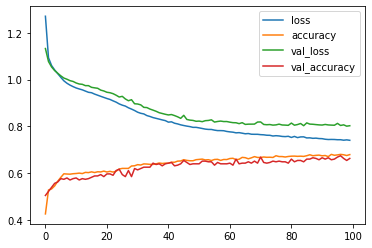

In [ ]:
# Trying out Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
model = Sequential()
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_trained_scaled,
                    y_train,
                    epochs=100,
                    validation_data=(X_test_scaled, y_test))

pd.DataFrame(history.history).plot()